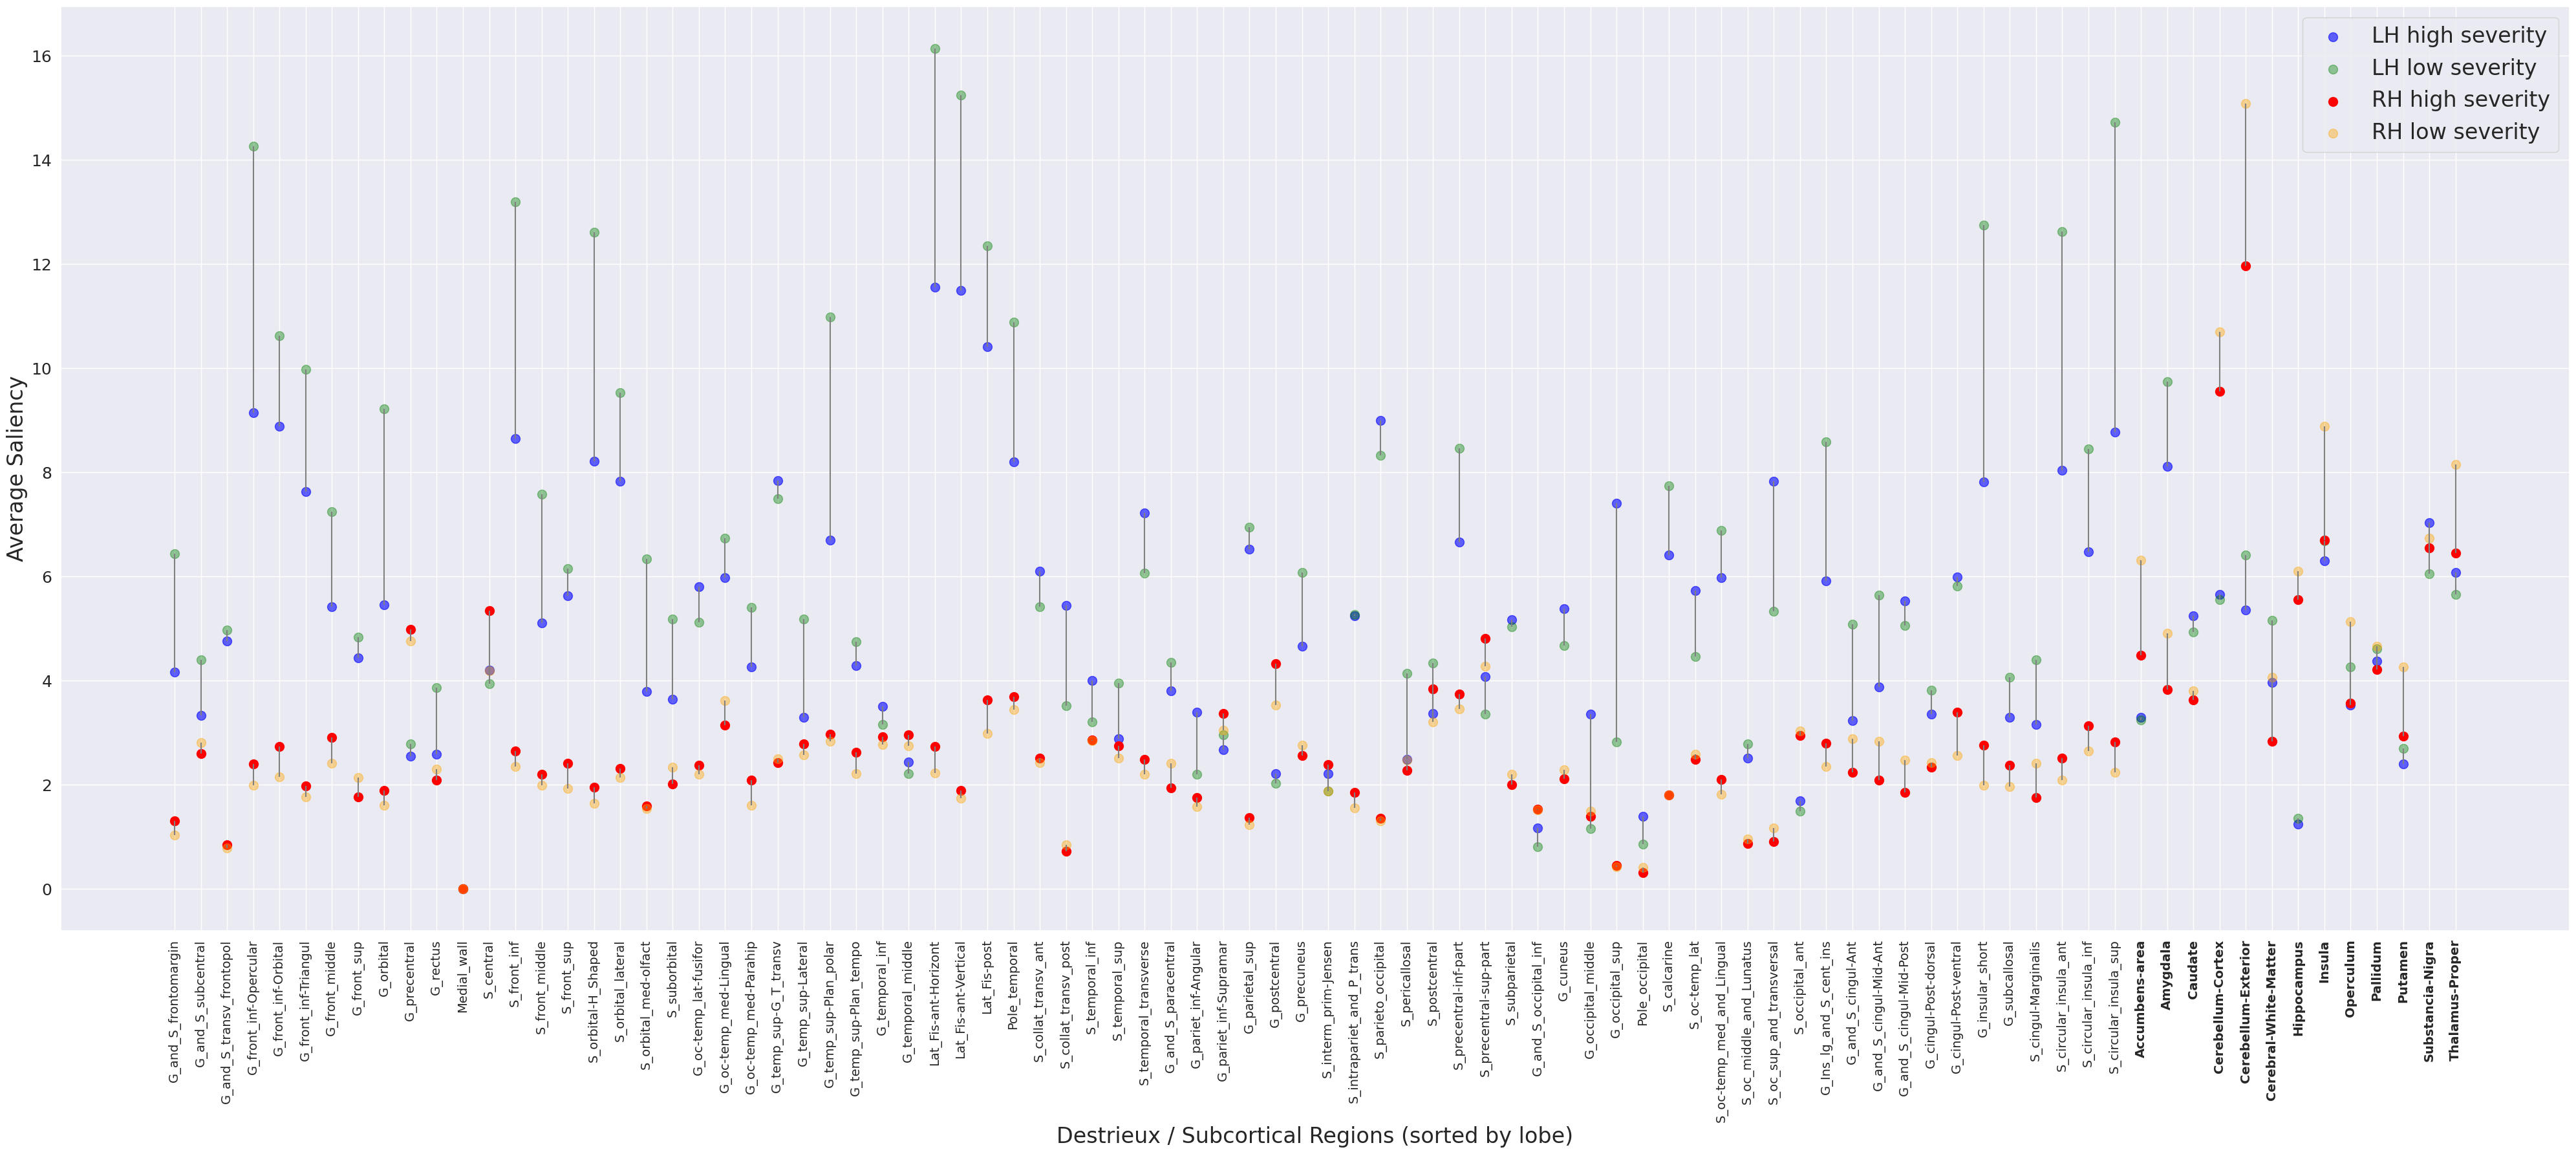

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme()

# --- Load data ---
# Cortical saliency data
cortical = pd.read_csv('/content/destrieux - Copy of plots.csv')

# Subcortical saliency data
subcortical = pd.read_csv('/content/destrieux - subcortical plots.csv')

# Lobe info for cortical regions
lobe_info = pd.read_csv('/content/destrieux - lobe.csv')  # columns: lobe, area

# --- Merge lobe info with cortical data ---
cortical = pd.merge(cortical, lobe_info, on='area', how='left')
cortical['lobe'] = cortical['lobe'].fillna('unknown')

# --- Label subcortical regions ---
subcortical['lobe'] = 'subcortical'

# --- Combine dataframes ---
combined = pd.concat([cortical, subcortical], ignore_index=True)

# --- Custom lobe order for sorting ---
lobe_order = ['frontal', 'temporal', 'parietal', 'occipital', 'limbic', 'insular', 'subcortical']
combined['lobe'] = pd.Categorical(combined['lobe'], categories=lobe_order, ordered=True)
combined = combined.sort_values(by=['lobe', 'area'])

# --- Track which rows are subcortical for bolding ---
is_subcortical = combined['lobe'] == 'subcortical'

# --- Extract data ---
area = combined['area']
sublhhighaverage = combined['lhhighaverage']
sublhlowaverage = combined['lhlowaverage']
subrhhighaverage = combined['rhhighaverage']
subrhlowaverage = combined['rhlowaverage']

# --- Plot ---
fig, ax = plt.subplots(figsize=(40, 18))  # Wider

# Horizontal bars and dots
plt.vlines(x=area, ymin=sublhhighaverage, ymax=sublhlowaverage, color='grey', alpha=1)
plt.scatter(area, sublhhighaverage, s=100, color='blue', alpha=0.6, label='LH high severity')
plt.scatter(area, sublhlowaverage, s=100, color='green', alpha=0.4 , label='LH low severity')
plt.vlines(x=area, ymin=subrhhighaverage, ymax=subrhlowaverage, color='grey', alpha=1)
plt.scatter(area, subrhhighaverage, s=100, color='red', alpha=1, label='RH high severity')
plt.scatter(area, subrhlowaverage, s=100, color='orange', alpha=0.4 , label='RH low severity')

# Labels and formatting
plt.xlabel('Destrieux / Subcortical Regions (sorted by lobe)', fontsize=24)
plt.ylabel('Average Saliency', fontsize=24)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=18)

# Bold subcortical region labels
for tick, is_sub in zip(ax.get_xticklabels(), is_subcortical):
    if is_sub:
        tick.set_fontweight('bold')

plt.legend(prop={'size': 24})
plt.tight_layout()
plt.show()


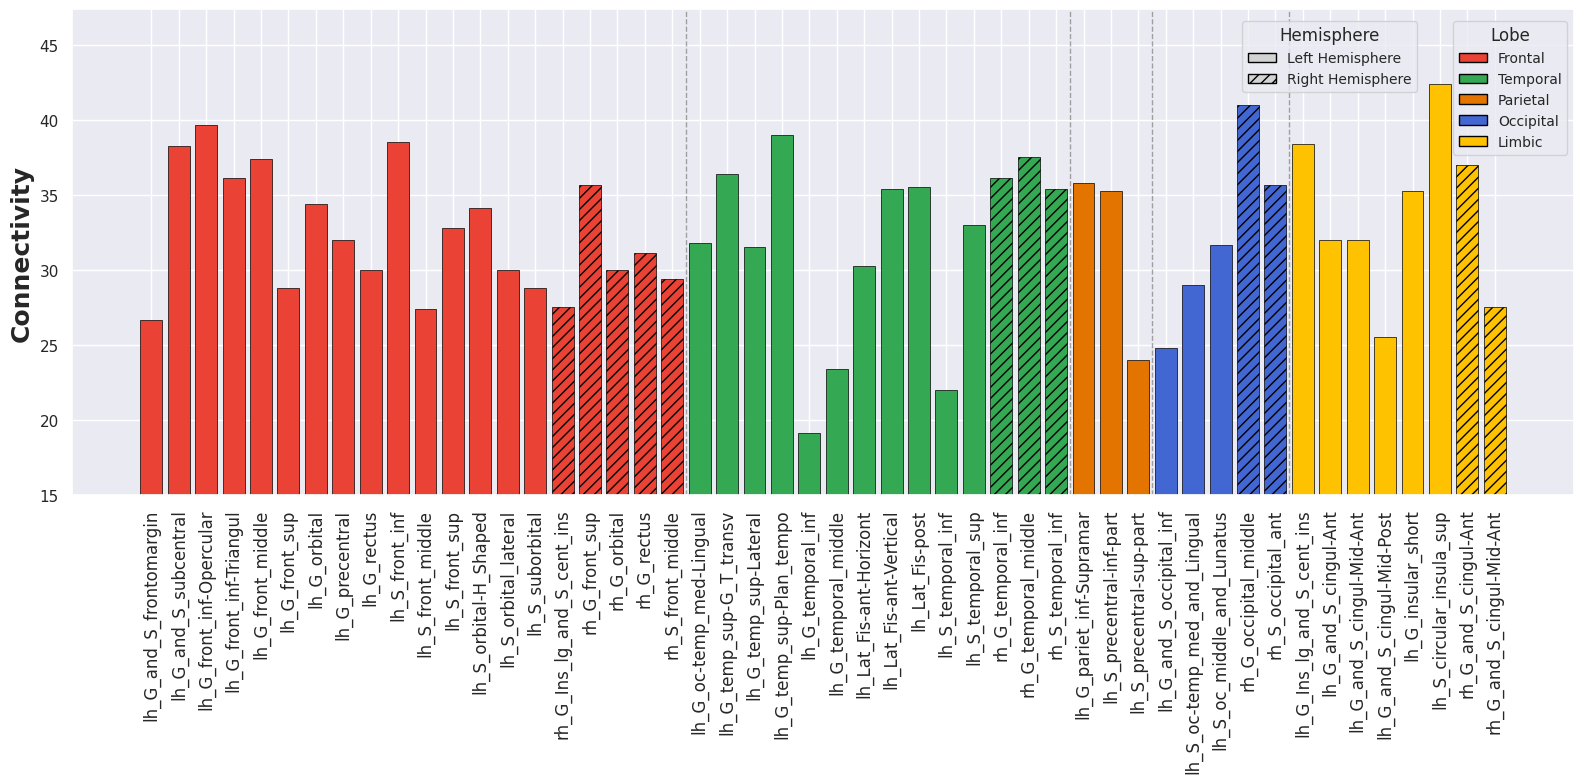

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

csv = pd.read_csv('/content/figure6c - Sheet1.csv')
brain_data = []
for i in range(50):
    data = [csv['lobe'][i], csv['hemisphere'][i], csv['region'][i], csv['score'][i]]
    brain_data.append(data)

# Set seaborn style
sns.set_theme()

# Create DataFrame and sort
df = pd.DataFrame(brain_data, columns=['Lobe', 'Hemisphere', 'Region', 'Connectivity'])
lobe_order = ['Frontal', 'Temporal', 'Parietal', 'Occipital', 'Limbic', 'Insular']
df['Lobe'] = pd.Categorical(df['Lobe'], categories=lobe_order, ordered=True)
df['Hemisphere'] = pd.Categorical(df['Hemisphere'], categories=['Left', 'Right'], ordered=True)
df = df.sort_values(['Lobe', 'Hemisphere', 'Region'], ascending=[True, True, True])

# Create plot
fig, ax = plt.subplots(figsize=(16, 8))

# Create x positions for proper ordering
x_positions = range(len(df))
bars = ax.bar(x_positions, df['Connectivity'])

# Customize bars by lobe color
lobe_colors = {
    'Frontal': '#ea4335ff',
    'Temporal': '#34a853ff',
    'Parietal': '#e37400ff',
    'Occipital': '#4267d2ff',
    'Limbic': '#ffc200ff',
    # 'Insular': '#965584ff'
}

# Apply lobe colors with hemisphere distinction
for i, (bar, (_, row)) in enumerate(zip(bars, df.iterrows())):
    base_color = lobe_colors[row['Lobe']]
    if row['Hemisphere'] == 'Left':
        bar.set_facecolor(base_color)
        bar.set_alpha(1)
        bar.set_hatch('')  # Solid fill for left
    else:
        bar.set_facecolor(base_color)
        bar.set_alpha(1)
        bar.set_hatch('///')  # Hatched pattern for right
    bar.set_edgecolor('black')
    bar.set_linewidth(0.5)

# Add lobe separators
current_lobe = None
for i, (_, row) in enumerate(df.iterrows()):
    if current_lobe != row['Lobe']:
        if current_lobe is not None:
            ax.axvline(x=i-0.5, color='gray', linestyle='--', alpha=0.7, linewidth=1)
        current_lobe = row['Lobe']

# Customize plot
ax.set_xticks(x_positions)
ax.set_xticklabels(df['Region'], rotation=90, ha='center', fontsize=12)
ax.set_ylabel('Connectivity', fontsize=18, fontdict={'weight': 'bold'})
ax.set_xlabel('')

ax.set_ylim(15, df['Connectivity'].max() + 5)


import matplotlib.patches as mpatches
import matplotlib.lines as mlines
# --- 1. Legend for lobes (color only) ---
lobe_patches = [
    mpatches.Patch(facecolor=color, edgecolor='black', label=lobe)
    for lobe, color in lobe_colors.items()
]

left_patch  = mpatches.Patch(facecolor='lightgray', edgecolor='black',
                             hatch='', label='Left Hemisphere')
right_patch = mpatches.Patch(facecolor='lightgray', edgecolor='black',
                             hatch='///', label='Right Hemisphere')

# First legend: Lobes (top-right inside)
legend1 = ax.legend(handles=lobe_patches, title='Lobe',
                    loc='upper right',           # inside top-right corner
                    bbox_to_anchor=(1, 0.99), # nudge away from edge
                    frameon=True, fontsize=10)
ax.add_artist(legend1)

# Second legend: Hemisphere (right side, below)
ax.legend(handles=[left_patch, right_patch], title='Hemisphere',
          loc='upper right',           # same side
          bbox_to_anchor=(0.90, 0.99), # lower vertical position
          frameon=True, fontsize=10)

plt.tight_layout()
plt.show()